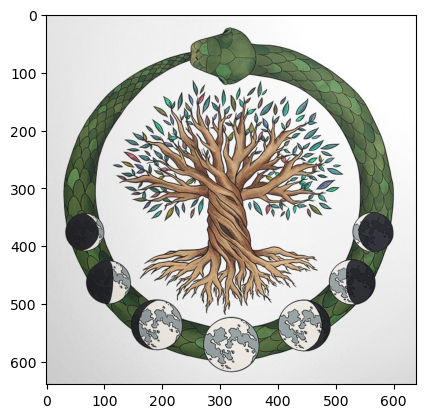

Breedte: 639
Hoogte: 639


In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Load the image directly using Matplotlib
current_path = os.getcwd()
loc_input_img = os.path.join(current_path,'..','data','input' ,'ouroboros.jpg')
image = plt.imread(loc_input_img)

# Display the image using Matplotlib
plt.imshow(image)
plt.show()

# Get the dimensions of the image
height, width, _ = image.shape

# Print the dimensions
print("Breedte:", width)
print("Hoogte:", height)



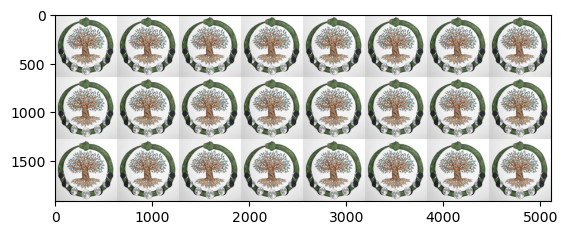

In [111]:
# Definieer het aantal rijen en kolommen in het rooster
rows = 3
columns = 8

# Maak een lege array voor het rooster
grid = np.zeros((height * rows, width * columns, channels), dtype=np.uint8)

# Vul het rooster met de gekopieerde afbeeldingen
for row in range(rows):
    for col in range(columns):
        grid[row * height: (row + 1) * height, col * width: (col + 1) * width] = np_image

# Toon het resulterende rooster
plt.imshow(grid)
plt.show()

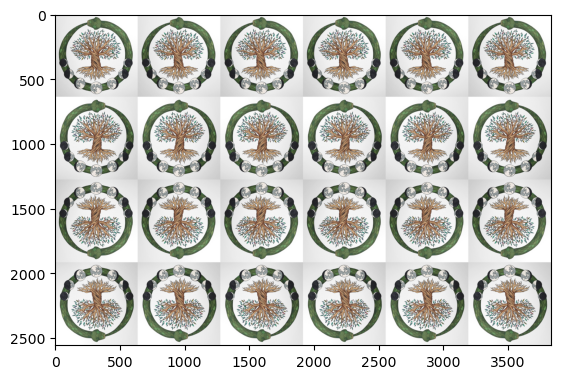

In [112]:
# Definieer het aantal rijen en kolommen in het rooster
rows = 4
columns = 6

# Maak een lege array voor het rooster
grid = np.zeros((height * rows, width * columns, channels), dtype=np.uint8)

# Vul het rooster met de gekopieerde afbeeldingen
for row in range(rows):
    for col in range(columns):
        # Spiegel de afbeelding afhankelijk van de huidige rij
        if row == 1:
            np_image_row = np.fliplr(np_image)
        elif row == 2:
            np_image_row = np.flipud(np_image)
        elif row == 3:
            np_image_row = np.flipud(np.fliplr(np_image))
        else:
            np_image_row = np_image
        grid[row * height: (row + 1) * height, col * width: (col + 1) * width] = np_image_row

# Toon het resulterende rooster
plt.imshow(grid)
plt.show()

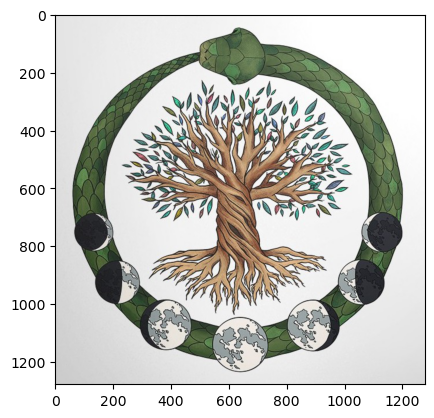

In [114]:
def resize_image(image, scale_factor):

    # Calculate the new dimensions
    new_height = int(height * scale_factor)
    new_width = int(width * scale_factor)
    
    # Create a new array to store the enlarged image
    enlarged_image = np.zeros((new_height, new_width, channels), dtype=np.uint8)
    
    # Iterate over each pixel in the enlarged image
    for i in range(new_height):
        for j in range(new_width):
            # Calculate the corresponding pixel position in the original image
            original_i = int(i / scale_factor)
            original_j = int(j / scale_factor)
            
            # Copy the pixel value from the original image to the enlarged image
            enlarged_image[i, j] = image[original_i, original_j]
    
    return enlarged_image

# Usage
scale_factor = 2
enlarged_image = resize_image(image, scale_factor)
plt.imshow(enlarged_image)
plt.show()


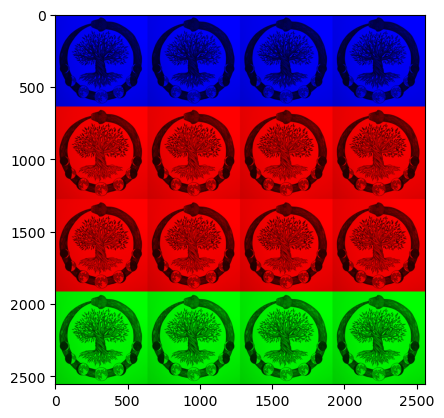

In [118]:
# Maak vier kopieën van de afbeelding
tiled_img = np.tile(image, (1, 4, 1))

# Verander de kleuren naar blauw, rood, groen
blue_f = tiled_img.copy()
blue_f[:,:,[0,1]] = 0

red_f = tiled_img.copy()
red_f[:,:,[1,2]] = 0

green_f = tiled_img.copy()
green_f[:,:,[0,2]] = 0

# Blauwe en rode afbeeldingen onder elkaar plakken
stacked_image = np.concatenate((blue_f, red_f, red_f, green_f), axis=0)
plt.imshow(stacked_image)
plt.show()



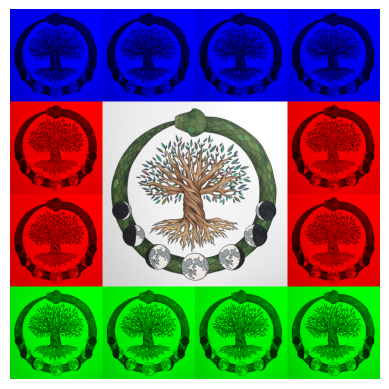

In [104]:
def overlay_images(background, foreground, position):
    # Create a copy of the background image to avoid modifying the original
    combined_image = np.copy(background)
    
    # Get the dimensions of the foreground image
    fg_height, fg_width, _ = foreground.shape
    
    # Extract the position to place the foreground image on the background
    x, y = position
    
    # Determine the region of interest (ROI) for overlaying the foreground image
    x_start = max(0, x)
    x_end = min(background.shape[1], x + fg_width)
    y_start = max(0, y)
    y_end = min(background.shape[0], y + fg_height)
    
    # Calculate the region of interest in the foreground image
    fg_x_start = x_start - x
    fg_x_end = fg_x_start + (x_end - x_start)
    fg_y_start = y_start - y
    fg_y_end = fg_y_start + (y_end - y_start)
    
    # Overlay the foreground image onto the background image
    combined_image[y_start:y_end, x_start:x_end] = foreground[fg_y_start:fg_y_end, fg_x_start:fg_x_end]
    
    return combined_image

# Load the background and foreground images
background_image = stacked_image
foreground_image = enlarged_image  # Ensure both images have the same dtype and shape

# Define the position to place the foreground image on the background
position = (639, 639)

# Overlay the foreground image on the background image
result_image = overlay_images(background_image, foreground_image, position)

# Display the result
plt.imshow(result_image)
plt.show()
